# Data Science regression Project:Predicting home prices in banglore

In [78]:
import pandas as pd  ##importing the necessary libraries 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
#matplotlib.rcparams["figure.figsize"]=(20,10)

In [79]:
df1=pd.read_csv("C:\\Users\\NAVYA\\OneDrive\\Desktop\\codebasics\\bengaluru_house_prices.csv")
df1.head()  ##reading the csv file

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data cleaning (Real Estate Prediction)

In [80]:
df1.shape 

(13320, 9)

In [81]:
df1.groupby('area_type')['area_type'].agg('count') ## knowing how many data samples are there in each area type by grouping the dataframe by areatype

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [82]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()  ##droping the unnecessary columns which seems to be not necessary for me so that i can reduce the complexity of the dataset

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


the first step in the data cleanin is to handle the null values and the data scientists spends most of their time in data cleaning i.e. feature engineering,outlier detection and removal

In [83]:
df2.isnull().sum() ##df.isnull().sum() methos will give the total no.of.null valued rows in each column in a dataset df

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [84]:
df3=df2.dropna()  ## df.dropna() function will remove all the null values in the given dataset
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [85]:
df3.shape

(13246, 5)

In [86]:
df3['size'].unique() #df.unique() function will give the total number of unique values available in the given dataframe column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

here we can observe that the size column has different values like 1 bhk and 4 Bedrooms so we will try to handle this data to keep it in uniform order

data cleaning takes more time as the datascientista has to deal with the unstructured data and has to clean and make them in the uniform form

In [87]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\NAVYA\AppData\Local\Temp\ipykernel_4784\4200255786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [88]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [89]:
df3['bhk'].unique()  ## checking what are the different types of the houses available in the dataset by checking the number of different bedrooms

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [90]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [91]:
df3['total_sqft'].unique() ## here from the above we can observe that there is a possibility for the error to occur and there  will be a need of tackling the error in the total sqft column as it is not possible to have the 43 bed rooms in 2400 sqft and 27 bedrooms in 8000ft
  
    
#first to handle the errors in the total sqft column first explore the total sqft column 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we can observe there are different types of total sqft values .let us know what are the versatile styles available in the total sqft column apart from the single value and the range value


Let us handle the total sqft column by converting the values to be a single value for that let us define a functio is_float(x) that will identify the values that are otherthan single values that help to handle that column to convert to the single value

In [92]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


now we are trying to define a function to handle the sqft values i.e. converting to a single value 

we can observe apart feom ssingle values and ranged values there are sq.Meter values and perch united values now here we are ignoring those values but we can handle those values also if we want to more sophisticated model

In [93]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  ##here N should be capital otherwise it will give an error

In [94]:
convert_sqft_to_num('3200') 

3200.0

In [95]:
convert_sqft_to_num("34.46Sq. Meter")

In [96]:
convert_sqft_to_num("1015 - 1540")

1277.5

To do a deep copy of a data fram we can use the df.copy() function

In [97]:
df4=df3.copy()  
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num) ##handling the total sqft column using our user defined function 
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [98]:
df4.loc[30]  ##checking the 30th index in the data frame

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

so far we have cleaned up the total square foot,size columns, and removed unecessary columns,also handled N.A so that the data frame looks better than the loaded one

In [99]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Feature Engineering(Real Estate Price Prediction)

In [100]:
df5=df4.copy()
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


now we are going to do some feature engineering. as we observe there are total sqft and price columns in the given dataset.

we know that in real world price per square foot is very important and crucial in defining the price of the house. so we can create the price per square feet column by dividing the total sqft and price columns of the given dataset

the resultant price_per_sqft column can be used later in outlier detection and removal

In [101]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']  #multiply the price series with 100000 as the prices are in the form of lakhs
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


here we can observe that the location column is a categorical column(i.e. text data). we can find the no.of.locations available in the given dataset and the no.of.rows (i.e.houses) are available in each location


if the no.of.locations are incresed then the complexity of the problem will incresae as it is a categorical variable.

we can handle the categorical text data by using onehot encoding technique e.t.c. but if we use here as the no.of.unique locatons are high the no.of.individual columns created as a result of the one hot encoding will be very high and the dataset will become very complex, and this is called as the <b> Dimensionality curse</b>

so one hot encoding is not preferable here there are so many other different techniques to reduce the dimension in the dataset

In [102]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [103]:
len(df5.location.unique())

1304

usually to handle the text data by creating dummies using one hot encoding but here it will lead to the dimensionality curse.

the best technique to reduce the dimensions is to come up with a Other category.(i.e) let's assume a threshold value and consider all  the values that are less than the threshold value into the other category so therefore the no.of.unique categories will be reduced i.e the dimensions will be reduced and the dataset  will be suitable for the one hot encoding for the categorical data handling

Now, let's know how many houses or the no.of.rows present in each location and based on the no.of.houses available we can set a threshold value and we can consider all the locations that are having the houses lessthan the threshold value to be a single category(i.e) <b>Othercategory</b> therefor the overall locations will be reduced i.e. categories will be reduced

In [104]:
df5.location=df5.location.apply(lambda x: x.strip())##clearing the leading and tailing spacing to make my dataset look good

location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)##grouping the dataframe by location that will give a column named location that stores the information of grouped data and gives the count of houses in each location in the sorted order by applying the aggregate functions
location_stats ##printing the location statistics

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

here for this let us consider the locations that are having the houses that are having less than 10 houses to be a single category called as the other category

In [105]:
len(location_stats[location_stats<=10])

1052

In [106]:
locaton_stats_less_than_10=location_stats[location_stats<=10]
locaton_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [107]:
df5.location=df5.location.apply(lambda x:'other' if x in locaton_stats_less_than_10 else x)
len(df5.location.unique())  #transforming some categories into other category

242

now the <b>242</b>  categories is some what good to apply the one hot encoding technique

In [108]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal(Real Estate Price Prediction)

Here we are going to do outlier detection and removal. outliers are the data errors or they represent the extreme variation in the dataset.although they are valid datapoints it makes sence to remove them otherwise it will create some issue later on.

we can apply different techniques to handle outlier detection and removal.we can use standard deviation method are we can use simple domain knowledge

generally in real estate the 2 bhk flat with total square foot of 500 is unusual we can also observe this in the given dataset now as a data scientist we will go to the bussiness manager and ask him whether there is any threshold value for the square foot per bedroom.let us say he says it as 300.now we will find all the datapoints that are having the typical square foot per bedroom less than 300 and remove them all they are the data errors or the outliers or the anomolies.

now we can simply remove these anomolies or outliers and create a new dataframe

In [109]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [110]:
df5.shape

(13246, 7)

In [111]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

Now let us try to handle some more outliers let us consider the price per square foot column,so firstly let us explore the statistics of the price_per_sqft column and try to get the datapoints that are having very minimum price_per_sqft or that are having very high/extreme price_per_sqft value 

In [112]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

it is highly impossible to get a house for 267 rupees per square feet and 176470 is very extreme price for the square foot in banglore although it is possible to have that exterme amount for some places but as we are trying to build a generic model we can handle these outliers

here we can handle these outliers using the standard deviation method as it makes sence to remove these extreme high and low values

now we can write a function that will remove these outliers based on the price_per_sqft per location i.e based on location because the price per square foot depends on the area using the standard deviation concept i.e. basedo on standard deviation concept

<b>If a dataset has a normal distribution (to which we are trying to convert our dataset to )then most of the dataa points around  68% of the datapoints will be in between the standard deviation and the mean.</b>
   
<b>Now we are going to filterout any datapoints that are beyond the mean and the one standard deviation</b>

here we are going to write a function that will remove the price_per_sqft outlier per location because the prices are different in different locations

for this we will find the mean and standard deviation per location and we will filter the datapoints that are beyond the mean and the one standard deviation in each location

In [113]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [114]:
df7=remove_pps_outliers(df6)  ##compared to the prervious dataset we removed closely 2000 outliers in the dataset
df7.shape

(10241, 7)

one more thing we want to check is that whether the price of the 3bhk is more than the size of the 2 bhk for same square foot area or not in the given data set at some locations we can observe that 3bhk has less price than the 2 bhk it may because of many reasons may be it is in near special eminities area or for may be some other reasons

and we want to do xome visualisation of how many such cases exists for that we are going to write a function that will use scatter plot to give visualisation

In [115]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    #matplotlib.rcparams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Toal Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

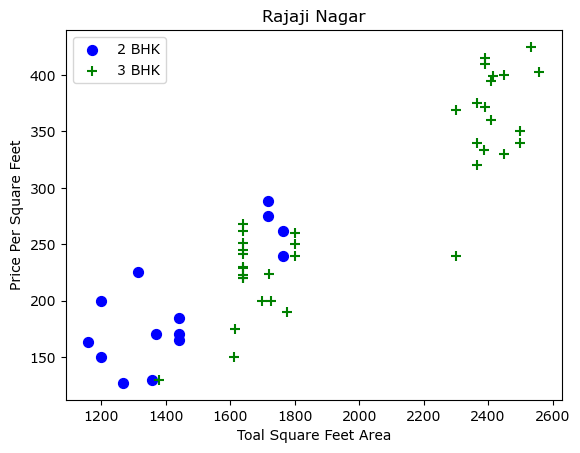

In [116]:
plot_scatter_chart(df7,"Rajaji Nagar")  ##let us tru this function for rajaji nagar location

in the above scatter plot we can observe that there are some datapoints where the 3bhk houses have less price than the 2 bhk houses in the same location per square foot area  and now we have to remove these outliers

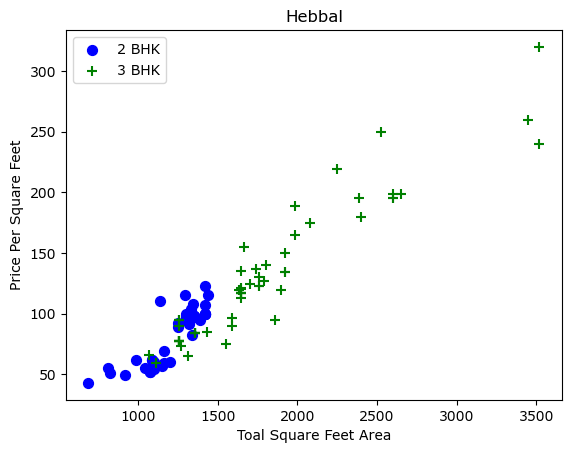

In [117]:
##let us try the scatter plot function for some other location ex:Hebbal
plot_scatter_chart(df7,"Hebbal")

Above also we can see blue dots are higher than the green dots. we can handle this using a function here

usually the 3bhk should have the higher price than the 2 bhk having the same total area square foot. this an outlier and we have to handle this outlier, we can handle this outlier by writing a function

<b>We should also remove properties where for same location, the price of(for example) 3 bedroom apartment is less than 2 bedroom apartment(with same square ft area). what we will do is for a given location, we will build a dictionary of stats per bhk.</b>
 {
   '1':{
      'mean':4000,
      'std':2000,
      'count':34
    },
   '2':{
       'mean':4300
       'std':2300
       'count':22
     },
 }
    
<b>Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</b>

In [118]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

from the above result we can observe that we have removed most of the outliers

Now let us try to plot the scatterplot again and understand how the outliersa are handled(i.e.how the outliers are removed)

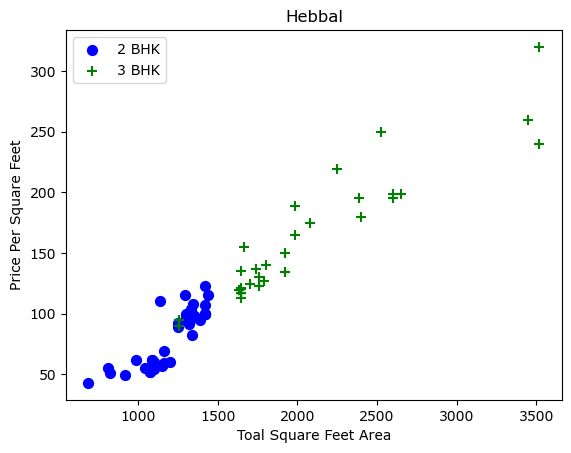

In [119]:
plot_scatter_chart(df8,"Hebbal")

<b>From the graph we can observe that as compared to the previous graph most of the green points that are less than the blue points are removed and most of the 3 BHK houses has higher price than the 2 BHK houses in the same area .even then also we can see some abnormalities i.e outliers they are very critical to remove and it is fine to have suvh type of abnormalities</b>

Now let us try to plot a histogram to get the count of how many properties are present per square foot area i.e. how the houses are distributed among the price per square foot range. where  the x axis represents the price per square foot and the y-axis is a histogram so it shows the no.of.propertiesor house i.e data points in that category

Text(0, 0.5, 'Count')

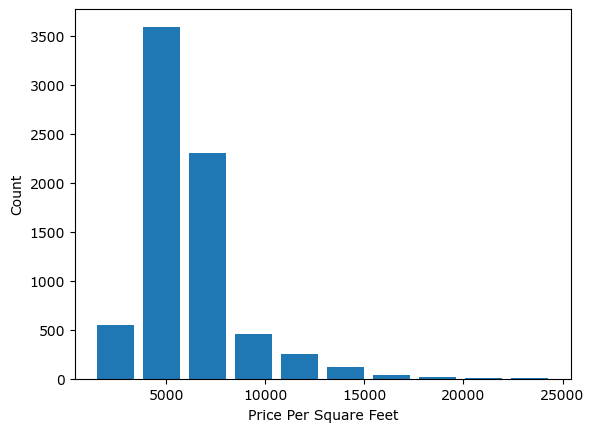

In [120]:
import matplotlib
#matplotlib.rcparams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8) ##here rwidth represents the width of the histogram bar
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<b> from the histogram we cam observe a bell curve i.e a gaussian curve this represents that our data is now in normal distribution and this looks good

<b>now let's explore the bathrooms feature and as a data scientist we will go to the bussiness manager and him is there any criteria for the bathroom specific outliers and usually he will say the houses which are having the no.of.bathrooms more than the no.of.bedrooms as outliers but we can have a possibility of having +2 the no.of.bedrooms as bathrooms so after a final discussion we come to a discussion that any house that are having more than +2 no.of.bathrooms than the double no.of.bedrooms can be considered as and we are going to remove those as outliers  outliers</b>

In [121]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [122]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

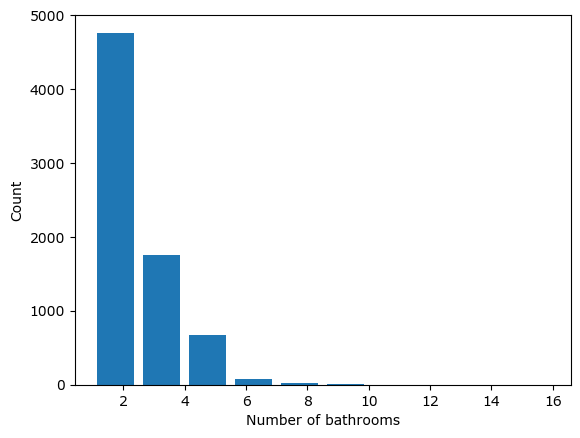

In [123]:
#let's try to plot a histogram representing how many properties having how many no.of.bathrooms
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel('Count')

From the graph we can observe that most of the houses have 2 bathrooms but there are some few outliers having more no.of.bathrooms 

<b>based on the decision taken by discussing with the bussiness manager we can mark those houses having no.of.bathrooms morethan +2 no.of.bedrooms as outliers
    
<b>Now let's write a function to handle the bathroom specific outliers based on the decision taken by discussing with the bussiness manager<b>

In [124]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [125]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape  

(7251, 7)

<b>Now the dataframe looks pretty clean and now we can statr preparing it for machine learning training for that we have to drop some unnecessary feaatures
    
<b>we can drop size feature as we already have the same feature bhk representing the same attribute of size of the house and we can drop the price_per_sqft feature as it is just created for the outlier detection and removal purpose and it does not have any use

In [126]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# (Model Building) Resl estate price prediction Project

<b>Till now we have cleaned our dataset and made it ready for model building and now we are going to build the machine learning model and we are going to use k-fold cross validation and grid search cv in order to comeup with a best algorithm with best parameters<b>

In our dataframe we can observe a location feature having the text data since we know that our machine learning models cannot handle with the text data i.e.categorical data so we have to convert the text data i.e.categorical data to numerical data for that we have many techniques one of those techniques is onehot encoding or pandas create dummies method where we create a separate column for each text data containing values 0 or 1

In [127]:
dummies =pd.get_dummies(df10.location) ## here we created the dummy columns for each categorical data and stored it in a new dataframe called dummies
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
##now let's conctinate the dummies dataframe to the original dataframe and while concatinating drop any one column in the dummies dataframe to avoid dummy variable trap and after that in the resultant data frame drop the location column as already we have done one hot encoding to that column and concatinated ot to the original dataframe
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df12=df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>As we can observe that we are at the df12 i.e this shows how long our data processing pipeline has become this is like a pipe line  where df1 is the 1st stage,df2 is the 2nd stage, df3 is the 3rd stage ..and df12 probably the 12th stage 
    
    
<b>Now we all set to start build the machine learnong model 

In [130]:
df12.shape  #we are examining the shape of the dataframe

(7251, 245)

<b>letus create a xvariable which contains only the independent variables so drop the price column which is the dependent feature
   

In [131]:
X=df12.drop('price',axis='columns') ## x contains all the independent features
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
y=df12.price  ##y is a variable which contains the dependent variable
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

<b>we are going to split the dataset into the training and testing datasets where the taining set is used to train the model and the testing set will be used to evaluate the performance of the model for that we are going to import train test split method from sklearn model selection and splitting the dataset

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [134]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()  #here we have creates a linear regresion model and trained it using fit method usin x_train and y_train and once the model is trained and we have evaluated the performance of the model using the score method
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.845227769787429

we can observe that the score is 84 % and the score is pretty good but as a datascientist we can try couple of different machine learning models with couple of different parameters and come up with the best optimal model

<b> for that first we are going to use the K-fold cross validation and in that we are going to use Shuffle split for the cross validation, Shuffle split will randomize the samples so that each of the fold has equal dustribution of the samples so that it's not just target one area

In [135]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

we can observe that we are getting the scores more than 80% even for the 5 splits for the linear regression model

<b> so as a datascientist we can try different machine learning models with different parameters  and find which one will give the best score for regression we have many other regression models other than linear regression like lasso regression, decision tree regression e.t.c and to find the best model we can use the Gridsearch CV. Gridsearch CV is an API that sklearn provides that will run the model on differnt regressors and dofferent parameters and gives the best score

for grid search CV we are going to write a function that has the configuration that contains the different algorithms and different parrameters.Grid search CV not only gives the best algoritm but it also gives the best parameters along with it

In [136]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [None]  # Adjust this parameter based on your needs
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Replace X and y with your dataset
# best_model_results = find_best_model_using_gridsearchcv(X, y)


In [137]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.819001,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.687430,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.712461,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


<b>based on the above we can say that linear regression model is best for that 

we are going to use the already built linear regression midel here and we are going to write a predict function to do some predictions on our dataset to chexk it's performance and here we can observe that the houses having the more bedrooms than those having the less bedrooms costs low eventhough they are of same area there may be many reasons for that and they may not be knoen because of complexity of the dataset in many cases and it may be because some people may not like the compact and small sized bedrooms

In [138]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [139]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [140]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900747835

In [141]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006965

In [142]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\NAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033549

<b>now the model building process is done and now we are going to exporting all the artifacts that are needed by the python flask server to different files
<b>we will export the model to pickle file so that we can use it in the python flask server

as a data scientist we have worked with bussiness manager and went through different iterations and tryed different models grid search cv,kfold cross validation and you cleaned up data and you removed outliers and you cameup with a awesome model which is ready to be used in production

ab training is used to compare the performance of the previous model with the present model

In [143]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [144]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:  # Change "columns.join" to "columns.json"
    f.write(json.dumps(columns))


In [145]:
#here we have created the json file to track the structure of how the columns are present in the dataset in the pickle model
##the pickle model size is very less because it will contain only the information about the coefficients and weights but not the actual data